In [18]:
import sys
import os
import time
import numpy as np
import theano
import theano.tensor as T
import lasagne
import pandas as pd
from util import *
from archs import *
from load_data import *
import train as tr

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_context('poster')
%matplotlib inline

In [ ]:
np.random.seed(985231)
net = tr.MNKNet(cnn5)
net.train(epochs=500)
net.test()

Compiling Theano expressions...
Loading data...
Start training...
Epoch 1 of 500 took 3.159s

In [ ]:
nlls = np.array([j for j in [net.val_fn(net.X[net.testset[i]], net.y[net.testset[i]])[0] 
                       for i in net.data.subject.unique()]]);

nlls.mean()

In [11]:
probe = output_fn(net.Xt)

In [4]:
errs = (probe.reshape([probe.shape[0], 4, 9]) * net.Xt.sum(axis=1)).sum(axis=1).sum(axis=1)
bigerr = errs.argmax()

# Figures

/Users/gianni/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


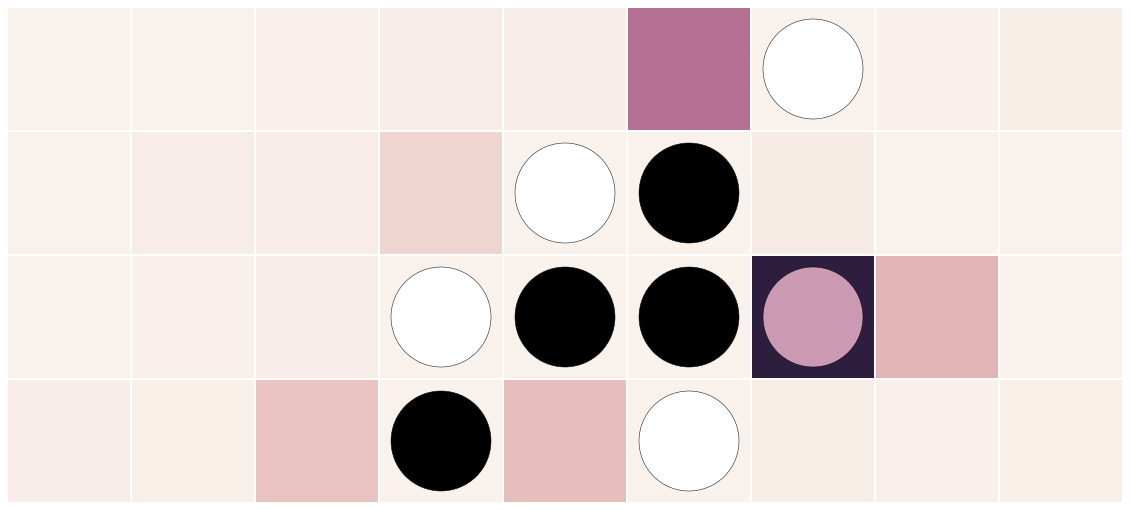

In [91]:
pos=463
fig, axes = plt.subplots(1, 1, figsize=(20, 10), squeeze=False)
sns.heatmap(probe[pos].reshape([4,9]), square=True, vmin=0, vmax=.25, cbar=False,
            xticklabels=False, yticklabels=False, ax=axes[0,0], annot=False)
p = np.where(net.Xt[pos, 0]==1)
plt.scatter( .5 + p[1], 3.5 - p[0], c='black', s=10000)
p = np.where(net.Xt[pos, 1]==1)
plt.scatter( .5 + p[1], 3.5 - p[0], c='white', s=10000)
p = (net.yt[pos] % 9, net.yt[pos] // 9)
plt.scatter(p[0] + .5, 3.5 - p[1], c=(.8, .6, .7), s=10000)
# fig.savefig('zero_prob_at_occupied.png', bbox_inches='tight')

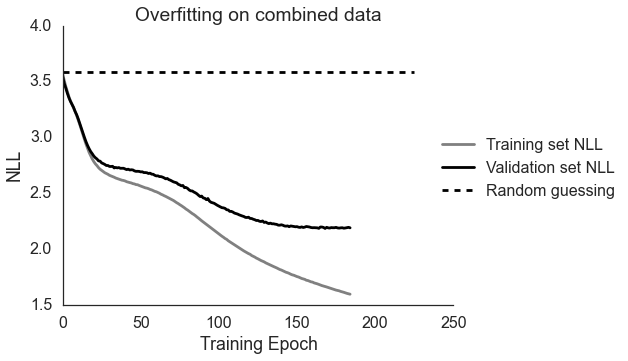

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(7,5), squeeze=False)
ep = net.last_epoch
ax = axes[0,0]
ax.plot(np.arange(net.tr_nll.size)[:ep], net.tr_nll[:ep]/33, 
         label='Training set NLL', color='grey')
ax.plot(np.arange(net.val_nll.size)[:ep], net.val_nll[:ep]/5, 
         label='Validation set NLL', color='black')
ax.plot([0, 225], [3.58, 3.58], 'k--', label='Random guessing')
lgd = ax.legend(bbox_to_anchor=(1.45, .65))
ax.set_xlabel('Training Epoch')
ax.set_ylabel('NLL')
ax.set_title('Overfitting on combined data')
sns.despine()
fig.savefig('training_slope.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

/Users/gianni/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


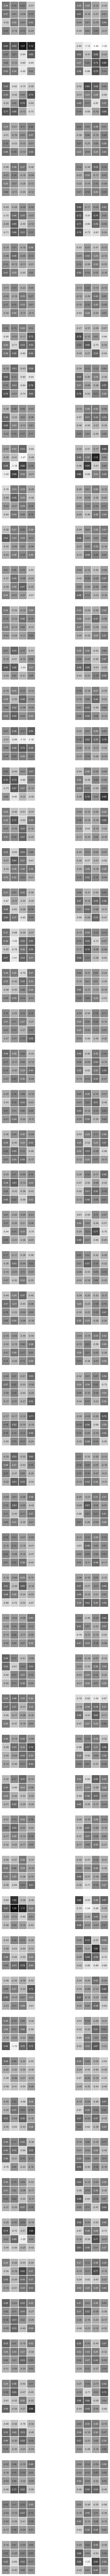

In [33]:
fig, axes = plt.subplots(64, 2, figsize=(10, 192), squeeze=False)

for idx in range(64):
    sns.heatmap(filters[idx,0], square=True, cmap='Greys', fmt= '.2f', 
                vmin=-1.5, vmax=1.5, annot=True,
                ax=axes[idx,0], cbar=False, xticklabels=False, yticklabels=False)
    sns.heatmap(filters[idx,1], square=True, cmap='Greys', fmt='.2f', 
                vmin=-1.5, vmax=1.5, annot=True,
                ax=axes[idx,1], cbar=False, xticklabels=False, yticklabels=False)

fig.savefig('filters.png', bbox_inches='tight')